<a href="https://colab.research.google.com/github/ImenMasmoudiEm/CCKInternshipProject/blob/main/CCK_Project_Unbalanced_09_Tunnel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification: Primary work

##Connecting to drive & importing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
os.chdir('/content/drive/MyDrive/All/Projects/Ing Internship/Data')

In [ ]:
import pandas as pd
data=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/final-dataset.xlsx")
data

,commentaire,classe
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,normal
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,hate
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,normal
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,hate
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,hate
...,...,...
23028,يلا ولا خنزير الله يرحم صدام حسين لي كان داعسكن,hate
23029,وبلدك سوريا لا تبغي سوا القتل والاجرام,hate
23030,معالي الوزير نؤمن بك دائما لأنك الدرع المنيع ف...,normal
23031,حياة سندي مستشارة امين عام الامم المتحدة بان ك...,normal


##Data Preprocessing

1/ Changing the Class into bin

In [ ]:
data['classe']=data['classe'].replace("hate", int(2))
data['classe']=data['classe'].replace("normal", int(0)) 
data['classe']=data['classe'].replace("abusive", int(1))

In [ ]:
data

,commentaire,classe
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,0
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,2
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,0
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,2
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,2
...,...,...
23028,يلا ولا خنزير الله يرحم صدام حسين لي كان داعسكن,2
23029,وبلدك سوريا لا تبغي سوا القتل والاجرام,2
23030,معالي الوزير نؤمن بك دائما لأنك الدرع المنيع ف...,0
23031,حياة سندي مستشارة امين عام الامم المتحدة بان ك...,0


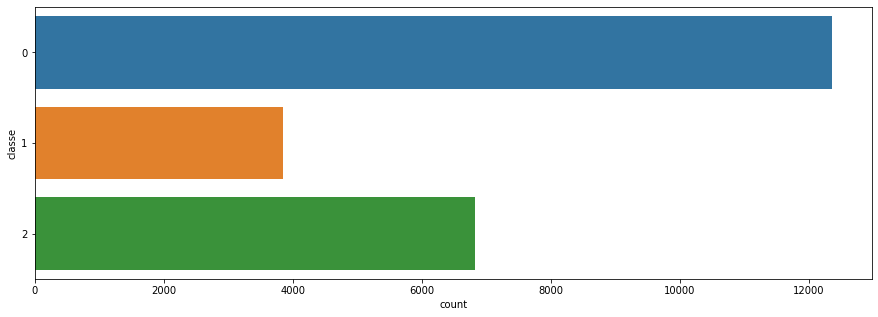

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data)
plt.show()

In [ ]:
print(data.loc[data.classe==0].groupby('classe')["classe"].count())
print(data.loc[data.classe==1].groupby('classe')["classe"].count())
print(data.loc[data.classe==2].groupby('classe')["classe"].count())

classe
0    12353
Name: classe, dtype: int64
classe
1    3850
Name: classe, dtype: int64
classe
2    6830
Name: classe, dtype: int64


2/ NLP Data Preparations: Data Balancing

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

sentences = []
labels = []

sentences = data['commentaire']
labels = data['classe']


labels = [int(i) for i in labels]


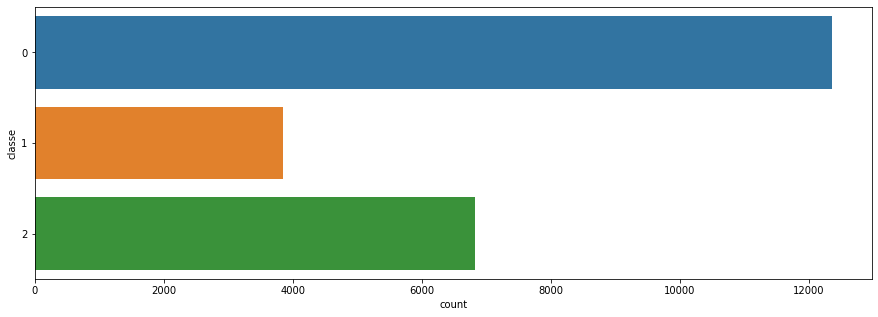

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data)
plt.show()

In [ ]:
#Figure out the longest comment

def count_words(input):
  return len(input.split())
max_length=count_words(max(sentences,key=count_words))
max_length

388

#Importing extra data

In [ ]:
data12=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/dataset1and2.xlsx")
data34=pd.read_excel("/content/drive/MyDrive/All/Projects/Ing Internship/Data/dataset3and4.xlsx")

data12['classe']=data12['classe'].replace("hate", int(2))
data12['classe']=data12['classe'].replace("normal", int(0)) 
data12['classe']=data12['classe'].replace("abusive", int(1))

data34['classe']=data34['classe'].replace("hate", int(2))
data34['classe']=data34['classe'].replace("normal", int(0)) 
data34['classe']=data34['classe'].replace("abusive", int(1))


C1=data12["commentaire"]
C2=data34["commentaire"]
L1=data12["classe"]
L2=data34["classe"]


data12=[[i,j] for i,j in zip(C1 , L1)]
data34=[[i,j] for i,j in zip(C2 , L2)]

data12=pd.DataFrame(data12,columns=["sentences","classe"])
data34=pd.DataFrame(data34,columns=["sentences","classe"])

In [ ]:
data12

,sentences,classe
0,اسغي ياشعب تونس تدعوا بالاسلام كفار الحمدلله ن...,2
1,قطع يد السارق توفرت الشروط شرط الحد الأدنى قيم...,0
2,تلوموش لطفي لعبدلي شرف,0
3,مستغرب شعب يسمع تفاهة شانو لى الدرجة الشعب تاف...,0
4,هههخ غزلتني مافهمتش شمدخلها الموضوع تتنطر وحده...,0
...,...,...
6455,وجهو وجه الطحين ورخس,1
6456,الله لا يبارك فيكم و في الي تزرعوا فيه اليوم ل...,2
6457,ملا حثالة مستدعيه ، قواد ولحاس ، طيح مستوى الب...,2
6458,شبعة خمج.اينما يقيم الجهل,2


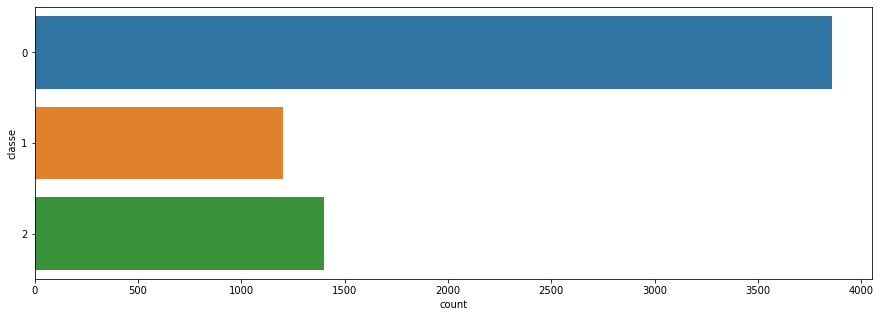

classe
0    3857
Name: classe, dtype: int64
classe
1    1204
Name: classe, dtype: int64
classe
2    1399
Name: classe, dtype: int64


In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data12)
plt.show()
print(data12.loc[data12.classe==0].groupby('classe')["classe"].count())
print(data12.loc[data12.classe==1].groupby('classe')["classe"].count())
print(data12.loc[data12.classe==2].groupby('classe')["classe"].count())

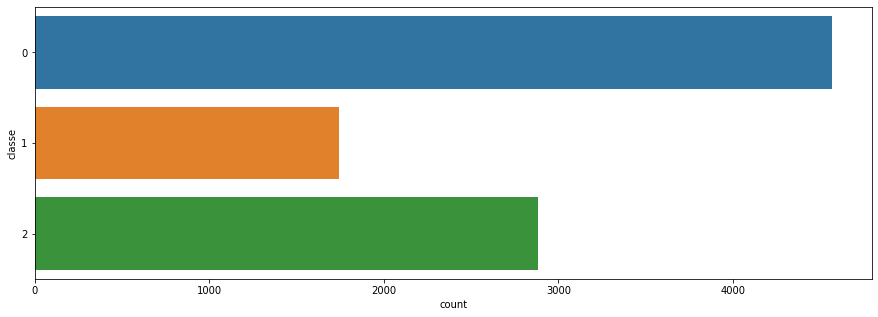

classe
0    4565
Name: classe, dtype: int64
classe
1    1746
Name: classe, dtype: int64
classe
2    2885
Name: classe, dtype: int64


In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'classe' , data = data34)
plt.show()
print(data34.loc[data34.classe==0].groupby('classe')["classe"].count())
print(data34.loc[data34.classe==1].groupby('classe')["classe"].count())
print(data34.loc[data34.classe==2].groupby('classe')["classe"].count())

##The way that the computers percieve words and phrases is diffrent from the way that we preceve it as human beings. There are a veriety of ways for us that we can utilise to program the data type that we have and to make it numerical so that the model can get some meaning out of it. We call this part encoding text.
##we can transfor each alphabet and caracter to it's ASCII Code, but this approach wasn't proven to give great results [To Research] !!!
#What I did in the code was: Continus or distributed Embeddings Vectors representation:
* First: Build a dictionary of tokens: I defined a dictionnary That has the words as keys and a unique number as a value
* I then changed all of the phrases into Lists that has integers that indicate which word is in that particular place
* Use One-Hot Vector

##After doing this process, we have a numerical data that the model can use to get some meaning out of the labels

In [ ]:
training_size=int(len(sentences)*0.9)   #Experimenting setup

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

embedding_dim = 16

tokenizer = Tokenizer(num_words=3000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

vocab_size = len(tokenizer.word_index) + 1 

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding='post', truncating='post')

In [ ]:
vocab_size

52849

In [ ]:
len(word_index)

52848

In [ ]:
Nsentences12=data12["sentences"]
Nlabels12=data12["classe"]

training_size12=int(len(Nsentences12)*0.8)

testing_sentences12 = Nsentences12[training_size12:]
testing_labels12 = Nlabels12[training_size12:]

Nsentences34=data34["sentences"]
Nlabels34=data34["classe"]

training_size34=int(len(Nsentences34)*0.8)

testing_sentences34 = Nsentences34[training_size34:]
testing_labels34 = Nlabels34[training_size34:]

In [ ]:
max_length12=count_words(max(testing_sentences12,key=count_words))
max_length12

206

In [ ]:
max_length34=count_words(max(testing_sentences34,key=count_words))
max_length34

29

###The Maximum length in the new data is less than 207, so we can padd them without losing information.

In [ ]:
testing_sequences12 = tokenizer.texts_to_sequences(testing_sentences12)
testing_padded12 = pad_sequences(testing_sequences12, maxlen=max_length, padding='post', truncating='post')

testing_sequences34 = tokenizer.texts_to_sequences(testing_sentences34)
testing_padded34 = pad_sequences(testing_sequences34, maxlen=max_length, padding='post', truncating='post')

#Modelling

##For The First Model

In [ ]:
import tensorflow as tf

model=tf.keras.models.Sequential ([
                                   tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                   tf.keras.layers.Conv1D(128, 5, activation='relu'),
                                   tf.keras.layers.Conv1D(filters=32, kernel_size=1, activation='selu'),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16,return_sequences=True)),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(units=3, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 388, 16)           845584    
                                                                 
 conv1d (Conv1D)             (None, 384, 128)          10368     
                                                                 
 conv1d_1 (Conv1D)           (None, 384, 32)           4128      
                                                                 
 bidirectional (Bidirectiona  (None, 384, 64)          16640     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 384, 64)          24832     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 384, 32)          1

In [ ]:
#For the First Model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'],run_eagerly=True)

training_padded = np.asarray(training_padded).astype(np.int)
training_labels = np.asarray(training_labels).astype(np.int)
testing_padded = np.asarray(testing_padded).astype(np.int)
testing_labels = np.asarray(testing_labels).astype(np.int)

#training_padded = np.expand_dims(training_padded, axis=1)
training_labels = np.expand_dims(training_labels, axis=1)
#testing_padded = np.expand_dims(testing_padded, axis=1)
testing_labels = np.expand_dims(testing_labels, axis=1)

history = model.fit(training_padded, training_labels, batch_size=128, epochs=50, validation_data=(testing_padded, testing_labels), verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note lin

Epoch 1/50
162/162 [==============================] - 33s 132ms/step - loss: 0.8880 - accuracy: 0.5910 - val_loss: 0.6789 - val_accuracy: 0.6884
Epoch 2/50
162/162 [==============================] - 21s 128ms/step - loss: 0.6647 - accuracy: 0.7278 - val_loss: 0.5421 - val_accuracy: 0.7860
Epoch 3/50
162/162 [==============================] - 21s 129ms/step - loss: 0.5573 - accuracy: 0.7836 - val_loss: 0.4685 - val_accuracy: 0.8190
Epoch 4/50
162/162 [==============================] - 21s 129ms/step - loss: 0.4910 - accuracy: 0.8117 - val_loss: 0.3986 - val_accuracy: 0.8468
Epoch 5/50
162/162 [==============================] - 21s 128ms/step - loss: 0.4372 - accuracy: 0.8318 - val_loss: 0.3633 - val_accuracy: 0.8559
Epoch 6/50
162/162 [==============================] - 21s 132ms/step - loss: 0.3869 - accuracy: 0.8558 - val_loss: 0.2804 - val_accuracy: 0.8993
Epoch 7/50
162/162 [==============================] - 21s 129ms/step - loss: 0.3432 - accuracy: 0.8716 - val_loss: 0.2618 - val_ac

In [ ]:
model.save("09greatmodel1.h5")

In [ ]:
#Epoch 50/50
#144/144 [==============================] - 20s 136ms/step - loss: 0.0813 - accuracy: 0.9614 - val_loss: 0.6606 - val_accuracy: 0.8817
#Epoch 30/30
#162/162 [==============================] - 21s 128ms/step - loss: 0.1041 - accuracy: 0.9544 - val_loss: 0.0967 - val_accuracy: 0.9583
#Epoch 50/50
#162/162 [==============================] - 21s 129ms/step - loss: 0.0881 - accuracy: 0.9584 - val_loss: 0.0812 - val_accuracy: 0.9596

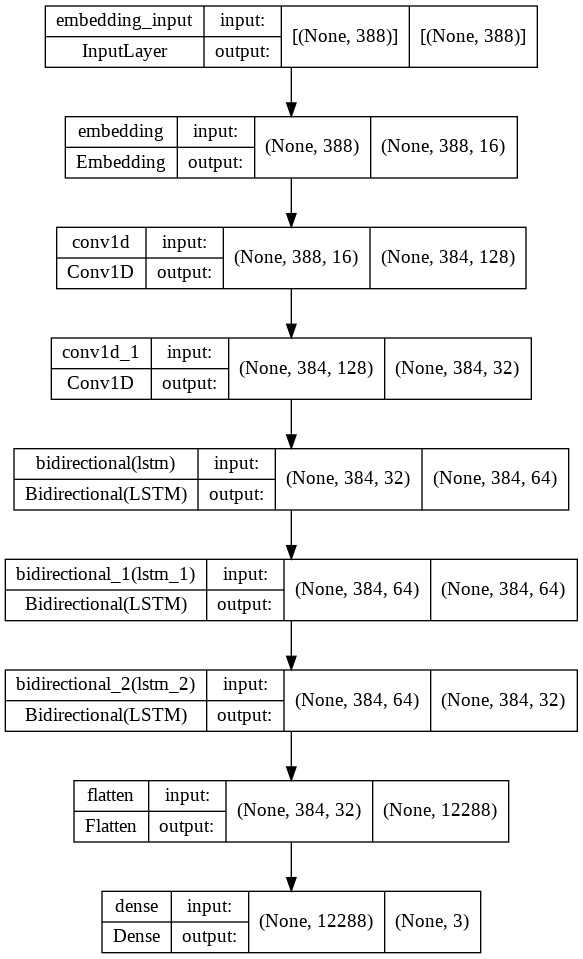

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
pred=model.predict(testing_padded)
rounded_labels1=np.argmax(pred, axis=1).astype(int)
cm = confusion_matrix(testing_labels, rounded_labels1)
print(cm)

[[1259    2    4]
 [  15  381   18]
 [  37   17  571]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(testing_labels, rounded_labels1, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1265
           1       0.95      0.92      0.94       414
           2       0.96      0.91      0.94       625

    accuracy                           0.96      2304
   macro avg       0.96      0.94      0.95      2304
weighted avg       0.96      0.96      0.96      2304



In [ ]:
pred12=model.predict(testing_padded12)
rounded_labels112=np.argmax(pred12, axis=1).astype(int)
cm12 = confusion_matrix(testing_labels12, rounded_labels112)
print(cm12)
print(classification_report(testing_labels12, rounded_labels112, labels=[0,1,2]))

[[513  29  45]
 [ 56 184  13]
 [ 87 143 222]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       587
           1       0.52      0.73      0.60       253
           2       0.79      0.49      0.61       452

    accuracy                           0.71      1292
   macro avg       0.70      0.70      0.68      1292
weighted avg       0.73      0.71      0.71      1292



In [ ]:
pred34=model.predict(testing_padded34)
rounded_labels134=np.argmax(pred34, axis=1).astype(int)
cm34 = confusion_matrix(testing_labels34, rounded_labels134)
print(cm34)
print(classification_report(testing_labels34, rounded_labels134, labels=[0,1,2]))

[[ 510    0   16]
 [   0    7    0]
 [  12    2 1293]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       526
           1       0.78      1.00      0.88         7
           2       0.99      0.99      0.99      1307

    accuracy                           0.98      1840
   macro avg       0.91      0.99      0.95      1840
weighted avg       0.98      0.98      0.98      1840



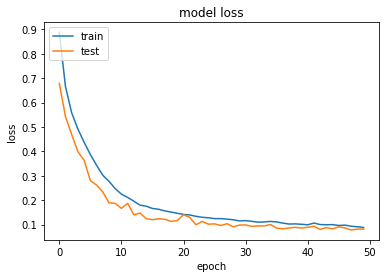

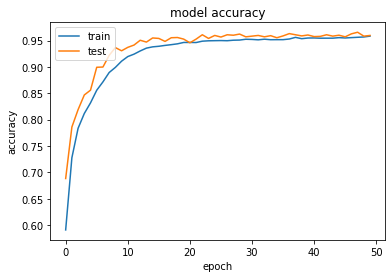

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##For the Second Model

In [ ]:
import tensorflow as tf
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 388, 16)           845584    
                                                                 
 conv1d_4 (Conv1D)           (None, 384, 128)          10368     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 flatten_5 (Flatten)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 24)                3096      
                                                                 
 dense_12 (Dense)            (None, 2)                 50        
                                                      

In [ ]:
model2.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])


history = model2.fit(training_padded, training_labels, batch_size=128, epochs=50, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
162/162 [==============================] - 2s 9ms/step - loss: 0.9675 - accuracy: 0.5484 - val_loss: 0.8455 - val_accuracy: 0.6458
Epoch 2/50
162/162 [==============================] - 1s 8ms/step - loss: 0.8244 - accuracy: 0.6373 - val_loss: 0.7574 - val_accuracy: 0.6858
Epoch 3/50
162/162 [==============================] - 1s 8ms/step - loss: 0.7709 - accuracy: 0.6636 - val_loss: 0.7062 - val_accuracy: 0.7300
Epoch 4/50
162/162 [==============================] - 1s 8ms/step - loss: 0.7299 - accuracy: 0.7014 - val_loss: 0.6609 - val_accuracy: 0.7752
Epoch 5/50
162/162 [==============================] - 1s 8ms/step - loss: 0.6955 - accuracy: 0.7198 - val_loss: 0.6274 - val_accuracy: 0.7222
Epoch 6/50
162/162 [==============================] - 1s 8ms/step - loss: 0.6657 - accuracy: 0.7140 - val_loss: 0.6005 - val_accuracy: 0.7383
Epoch 7/50
162/162 [==============================] - 1s 8ms/step - loss: 0.6385 - accuracy: 0.7297 - val_loss: 0.5744 - val_accuracy: 0.7509
Epoch 

In [ ]:
model2.save("09AnotherGreatModel.h5")

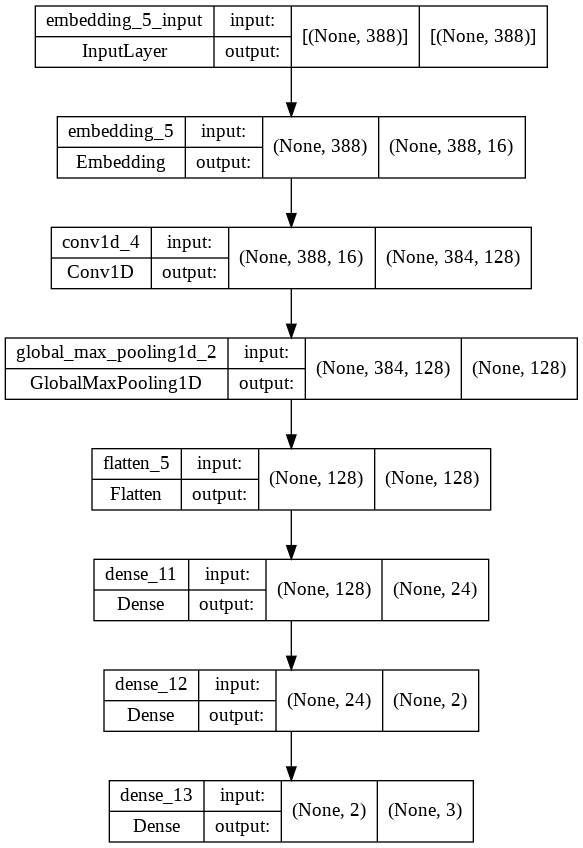

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
pred1=model2.predict(testing_padded)

pred11=[]
for i in pred1:
  if i[0]==max(i):
    pred11.append(0)
  elif i[1]==max(i):
    pred11.append(1)
  else:
    pred11.append(2)
#rounded_labels11=np.argmax(pred11, axis=1).astype(int)
cm = confusion_matrix(testing_labels, pred11)
cm

array([[1262,    0,    3],
       [  15,  342,   57],
       [  61,   41,  523]])

In [ ]:
#Epoch 50/50
#144/144 [==============================] - 1s 8ms/step - loss: 0.3237 - accuracy: 0.9319 - val_loss: 0.4529 - val_accuracy: 0.8728
#Epoch 30/30
#162/162 [==============================] - 1s 8ms/step - loss: 0.6225 - accuracy: 0.7719 - val_loss: 0.6345 - val_accuracy: 0.7700

In [ ]:
print(classification_report(testing_labels, pred11, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1265
           1       0.89      0.83      0.86       414
           2       0.90      0.84      0.87       625

    accuracy                           0.92      2304
   macro avg       0.91      0.89      0.90      2304
weighted avg       0.92      0.92      0.92      2304



In [ ]:
pred12=model2.predict(testing_padded12)
rounded_labels212=np.argmax(pred12, axis=1).astype(int)
cm12 = confusion_matrix(testing_labels12, rounded_labels212)
print(cm12)
print(classification_report(testing_labels12, rounded_labels212, labels=[0,1,2]))

[[513  12  62]
 [ 53 166  34]
 [ 97 116 239]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       587
           1       0.56      0.66      0.61       253
           2       0.71      0.53      0.61       452

    accuracy                           0.71      1292
   macro avg       0.68      0.69      0.68      1292
weighted avg       0.71      0.71      0.70      1292



In [ ]:
pred34=model2.predict(testing_padded34)
rounded_labels234=np.argmax(pred34, axis=1).astype(int)
cm34 = confusion_matrix(testing_labels34, rounded_labels234)
print(cm34)
print(classification_report(testing_labels34, rounded_labels234, labels=[0,1,2]))

[[ 514    3    9]
 [   0    5    2]
 [  35   69 1203]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       526
           1       0.06      0.71      0.12         7
           2       0.99      0.92      0.95      1307

    accuracy                           0.94      1840
   macro avg       0.66      0.87      0.68      1840
weighted avg       0.97      0.94      0.95      1840



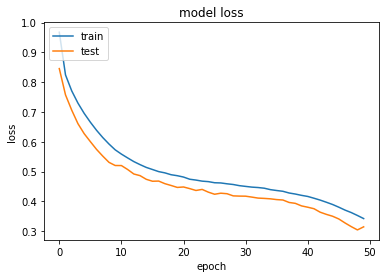

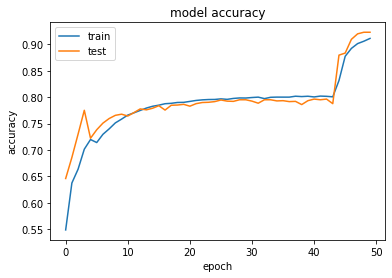

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##For The Third Model

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 388, 16)           845584    
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 24)                1560      
                                                                 
 dense_7 (Dense)             (None, 3)                 75        
                                                                 
Total params: 859,763
Trainable params: 859,763
Non-trainable params: 0
________________________________________________

In [ ]:
model3.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
history = model3.fit(training_padded, training_labels, batch_size=128, epochs=50, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
162/162 [==============================] - 11s 49ms/step - loss: 0.9343 - accuracy: 0.5657 - val_loss: 0.7419 - val_accuracy: 0.6953
Epoch 2/50
162/162 [==============================] - 6s 39ms/step - loss: 0.7066 - accuracy: 0.7078 - val_loss: 0.5743 - val_accuracy: 0.7739
Epoch 3/50
162/162 [==============================] - 5s 29ms/step - loss: 0.5771 - accuracy: 0.7741 - val_loss: 0.4905 - val_accuracy: 0.8116
Epoch 4/50
162/162 [==============================] - 5s 29ms/step - loss: 0.5173 - accuracy: 0.8033 - val_loss: 0.4562 - val_accuracy: 0.8372
Epoch 5/50
162/162 [==============================] - 5s 29ms/step - loss: 0.4826 - accuracy: 0.8124 - val_loss: 0.4211 - val_accuracy: 0.8472
Epoch 6/50
162/162 [==============================] - 5s 30ms/step - loss: 0.4647 - accuracy: 0.8221 - val_loss: 0.3977 - val_accuracy: 0.8542
Epoch 7/50
162/162 [==============================] - 5s 30ms/step - loss: 0.4469 - accuracy: 0.8296 - val_loss: 0.4006 - val_accuracy: 0.848

In [ ]:
model3.save("09AnotherThirdGreatModel.h5")

In [ ]:
#Epoch 50/50
#144/144 [==============================] - 4s 30ms/step - loss: 0.1877 - accuracy: 0.9307 - val_loss: 0.4655 - val_accuracy: 0.8715
#Epoch 30/30
#162/162 [==============================] - 5s 29ms/step - loss: 0.2697 - accuracy: 0.9025 - val_loss: 0.2184 - val_accuracy: 0.9223
#Epoch 50/50
#162/162 [==============================] - 5s 30ms/step - loss: 0.1681 - accuracy: 0.9307 - val_loss: 0.1333 - val_accuracy: 0.9414

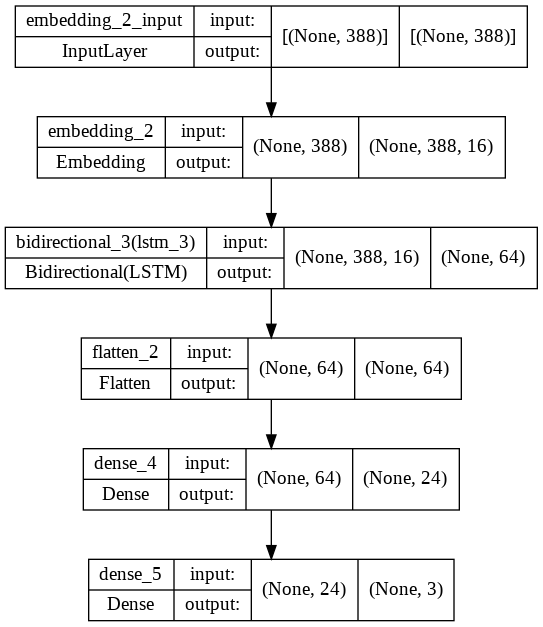

In [ ]:
tf.keras.utils.plot_model(model3, show_shapes=True)

In [ ]:
pred3=model3.predict(testing_padded)
rounded_labels3=np.argmax(pred3, axis=1).astype(int)
cm2 = confusion_matrix(testing_labels, rounded_labels3)
cm2

array([[1249,    2,   14],
       [  27,  373,   14],
       [  46,   32,  547]])

In [ ]:
print(classification_report(testing_labels, rounded_labels3, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1265
           1       0.92      0.90      0.91       414
           2       0.95      0.88      0.91       625

    accuracy                           0.94      2304
   macro avg       0.94      0.92      0.93      2304
weighted avg       0.94      0.94      0.94      2304



In [ ]:
pred12=model3.predict(testing_padded12)
rounded_labels312=np.argmax(pred12, axis=1).astype(int)
cm12 = confusion_matrix(testing_labels12, rounded_labels312)
print(cm12)
print(classification_report(testing_labels12, rounded_labels312, labels=[0,1,2]))

[[505  37  45]
 [ 56 184  13]
 [ 94 131 227]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       587
           1       0.52      0.73      0.61       253
           2       0.80      0.50      0.62       452

    accuracy                           0.71      1292
   macro avg       0.70      0.70      0.68      1292
weighted avg       0.73      0.71      0.70      1292



In [ ]:
pred34=model3.predict(testing_padded34)
rounded_labels334=np.argmax(pred34, axis=1).astype(int)
cm34 = confusion_matrix(testing_labels34, rounded_labels334)
print(cm34)
print(classification_report(testing_labels34, rounded_labels334, labels=[0,1,2]))

[[ 450    0   76]
 [   1    5    1]
 [  26    4 1277]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       526
           1       0.56      0.71      0.63         7
           2       0.94      0.98      0.96      1307

    accuracy                           0.94      1840
   macro avg       0.81      0.85      0.83      1840
weighted avg       0.94      0.94      0.94      1840



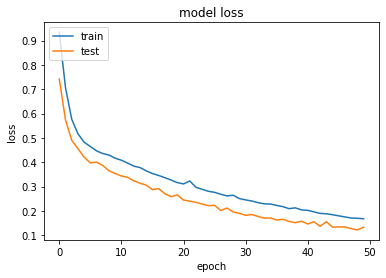

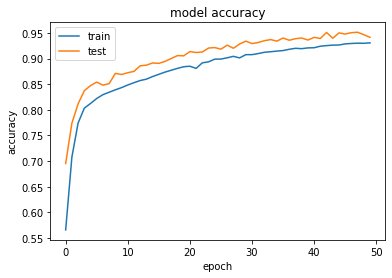

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Conclusion
###The accuracy for the three models is 88%, 87% and 87%. The complexity varies between them too. The first model has 937 891 trainale parameters which makes it the most complex amongs the three of them with the second having 618 083 trainable parameters and the third having 618 739 trainable parameters.


#Terms
##BURT: is a transformar model
##Sentiment Classification: A prabability distrubution over two classes
##Text Encoding: How to encode the texts into a numerical presentation that we can be handled by the machine learning model
##Transformers: The State-Of-The-Art architecture for language modeling
#Word2vec: 2013, The Model that introduced distributed representations for language modeling